# Introdução 
Kannada é um língua falada predominantemente pelo povo de Karnataka, localizada na região sudoeste da Índia. Essa língua possui aproximandente 45 milhões de praticantes.

O objetivo desse projeto é construir uma Rede Neural Convulucional (CNN) que consiga interpretar a escrita kannadense a partir de um banco de dados, onde há mais de 60.000 imagens de 0 a 9 escritos a mão em kannadense


In [1]:
# Importando bibliotecas 
import pandas as pd
import seaborn as sns
import numpy as  np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
# Transformando datasets em dataframes
train = pd.read_csv('Kannada-MNIST/train.csv')
test = pd.read_csv('Kannada-MNIST/test.csv')

___
# Conhecendo os dados 

Cada imagem possui 28 pixels em altura e 28 em comprimento, o que totaliza 784 pixels por imagem (28x28). Cada pixel tem o seu próprio valor associado, o que indica o tom claro e escuro do respectivo pixel, onde um valor alto representa escuro e baixo representa claro. Os valores do pixel são números inteiros e variam entre 0 e 255. 

Para podermos observar melhor a essas iamgens e como elas sem comportam, realizaremos uma análise desses dados. 

In [9]:
# Checando o tamanho do nosso dataframe 
print('O dataframe de TREINO possui {} LINHAS e {} COLUNAS'.format(train.shape[0], train.shape[1]))
print('O dataframe de TESTE possui {} LINHAS e {} COLUNAS'.format(test.shape[0], test.shape[1]))

O dataframe de TREINO possui 60000 LINHAS e 785 COLUNAS
O dataframe de TESTE possui 5000 LINHAS e 785 COLUNAS


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

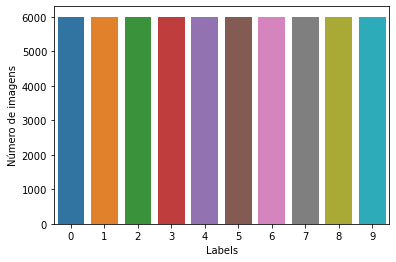

In [5]:
sns.barplot(train.label.value_counts().index, train.label.value_counts())
plt.xlabel('Labels')
plt.ylabel('Número de imagens')
plt.show()

Aqui plotamos um gráfico de barra para entendermos como está a distribuição das imagens. No nosso dataset, podemos observar que o número de imagens está uniformemente distribuido, o que nos leva a não precisar realizar algum tratamento ou manipulação em relação à quantidade para cada label.

In [6]:
train.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

Para cada label, temos 6.000 imagens, o que é um bom número para se trabalhar. 

Em semguida, vamos plotar uma das imagens. Como os pixels estão distribuídos em 784 colunas, precisamos reagrupá-las de forma que estajem no formato 28x28. Por isso utilizaremos o reshape.

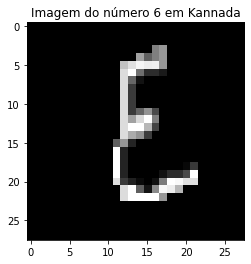

In [10]:
num = 6
number = train.iloc[num,1:].values.reshape(28,28)
plt.imshow(number, cmap=plt.get_cmap('gray'))
plt.title('Imagem do número {} em Kannada'.format(str(num)))
plt.show()

___
# Pré-processamento dos dados 

In [8]:
# Separando feature e targets 
X_train=train.drop('label',axis=1)
Y_train=train.label